In [1]:
import pandas as pd

csv_input = pd.read_csv('files/evaluation/random_0.csv')
data = csv_input[list(('x', 'y'))]
data

,x,y
0,-184.810776,-16.894972
1,-184.810776,-16.894972
2,-184.810638,-16.893084
3,-184.810516,-16.892187
4,-184.809372,-16.881786
...,...,...
1796,-99.072975,-144.216309
1797,-99.603806,-144.216461
1798,-100.128716,-144.216568
1799,-100.643677,-144.216675


In [33]:
data = data.head(600)
data

,x,y
0,36.570583,194.587891
1,36.570583,194.587891
2,36.569874,194.587677
3,36.571049,194.587692
4,36.597630,194.582260
...,...,...
595,30.304827,107.439331
596,30.304827,107.439331
597,30.304827,107.439331
598,30.304827,107.439331


In [2]:
observed = data.to_numpy()
observed

array([[-184.81077576,  -16.89497185],
       [-184.81077576,  -16.89497185],
       [-184.81063843,  -16.89308357],
       ...,
       [-100.12871552, -144.21656799],
       [-100.64367676, -144.2166748 ],
       [-101.10899353, -144.21678162]])

In [3]:
import matplotlib.pyplot as plt
#If you want to do it in town11 use:
#center = (390, 700)
#x_scale = 1/25
#y_scale = -1/25

def calculatePosition(x,y):
    center = (390, 330)
    #center = (390, 700)
    x_scale = 1.25
    y_scale = -1.25
    return ((x*x_scale+center[0]), (y*y_scale+center[1]))

def plot_pred(observed, future, predicted):
    #img = plt.imread("assets/Town05_0.5sqk.jpg")

    img = plt.imread("assets/Town11_400sqk.png")

    fig, ax = plt.subplots()
    ax.imshow(img)

    xs = []
    ys = []
    fxs = []
    fys = []
    pxs = []
    pys = []
    
    for v in observed:
        (x,y) = calculatePosition(v[0], v[1])
        xs.append(x)
        ys.append(y)

    for v in future[:len(predicted)]:
        (x,y) = calculatePosition(v[0], v[1])
        fxs.append(x)
        fys.append(y)
    
    for v in predicted:
        (x,y) = calculatePosition(v[0], v[1])
        pxs.append(x)
        pys.append(y)

    plt.scatter(fxs, fys, color="orange", zorder=1)
    plt.scatter(pxs, pys, color="red", zorder=3)
    plt.scatter(xs, ys, color="blue", zorder=2)
    plt.legend(['ActualFuture', 'PredictedFuture', 'Input'])
    plt.show()

def plot(observed):
    img = plt.imread("assets/Town05_0.5sqk.jpg")

    #img = plt.imread("assets/Town11_400sqk.png")

    fig, ax = plt.subplots()
    ax.imshow(img)

    xs = []
    ys = []
    
    for v in observed:
        (x,y) = calculatePosition(v[0], v[1])
        xs.append(x)
        ys.append(y)
    
    marker_on = [xs[0], xs[len(xs)-1]]

    plt.scatter(xs, ys, color="blue", zorder=2)
    plt.legend(['ActualFuture'])
    plt.show()

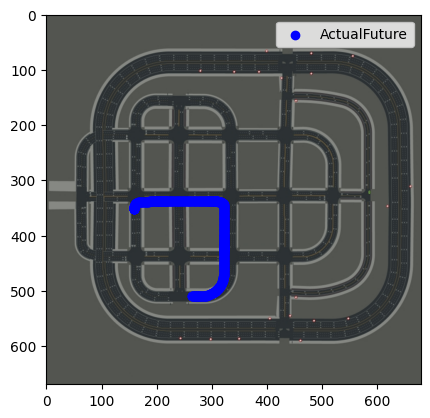

In [4]:
plot(observed=observed)

In [7]:
size = 10000000

for item in range(0, 162):
    csv_input = pd.read_csv('files/data_07mars2024/random_'+str(item)+'.csv')
    data = csv_input[list(('x', 'y'))]
    if size > len(data):
        size = len(data)

size

1801